# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

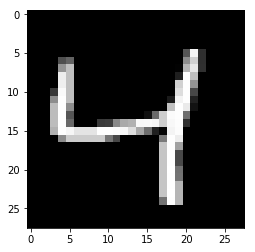

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
learning_rate = 0.001
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, shape=[None, image_size], name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6828
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6713
Epoch: 1/20... Training loss: 0.6667
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6485
Epoch: 1/20... Training loss: 0.6366
Epoch: 1/20... Training loss: 0.6260
Epoch: 1/20... Training loss: 0.6124
Epoch: 1/20... Training loss: 0.6007
Epoch: 1/20... Training loss: 0.5840
Epoch: 1/20... Training loss: 0.5708
Epoch: 1/20... Training loss: 0.5543
Epoch: 1/20... Training loss: 0.5427
Epoch: 1/20... Training loss: 0.5177
Epoch: 1/20... Training loss: 0.5001
Epoch: 1/20... Training loss: 0.4810
Epoch: 1/20... Training loss: 0.4647
Epoch: 1/20... Training loss: 0.4501
Epoch: 1/20... Training loss: 0.4389
Epoch: 1/20... Training loss: 0.4214
Epoch: 1/20... Training loss: 0.4030
Epoch: 1/20... Training loss: 0.3917
E

Epoch: 1/20... Training loss: 0.2030
Epoch: 1/20... Training loss: 0.2091
Epoch: 1/20... Training loss: 0.2011
Epoch: 1/20... Training loss: 0.2062
Epoch: 1/20... Training loss: 0.2043
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.2087
Epoch: 1/20... Training loss: 0.2194
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.2055
Epoch: 1/20... Training loss: 0.2066
Epoch: 1/20... Training loss: 0.2079
Epoch: 1/20... Training loss: 0.1999
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.2134
Epoch: 1/20... Training loss: 0.2035
Epoch: 1/20... Training loss: 0.2137
Epoch: 1/20... Training loss: 0.2033
Epoch: 1/20... Training loss: 0.2033
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.2001
Epoch: 1/20... Training loss: 0.2016
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1998
E

Epoch: 2/20... Training loss: 0.1705
Epoch: 2/20... Training loss: 0.1694
Epoch: 2/20... Training loss: 0.1674
Epoch: 2/20... Training loss: 0.1710
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1698
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1766
Epoch: 2/20... Training loss: 0.1668
Epoch: 2/20... Training loss: 0.1692
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1645
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1667
Epoch: 2/20... Training loss: 0.1697
Epoch: 2/20... Training loss: 0.1674
Epoch: 2/20... Training loss: 0.1706
Epoch: 2/20... Training loss: 0.1738
Epoch: 2/20... Training loss: 0.1724
Epoch: 2/20... Training loss: 0.1660
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1680
Epoch: 2/20... Training loss: 0.1693
E

Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1470
Epoch: 3/20... Training loss: 0.1452
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1458
Epoch: 3/20... Training loss: 0.1448
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1473
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1489
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1485
Epoch: 3/20... Training loss: 0.1487
Epoch: 3/20... Training loss: 0.1452
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1443
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1485
E

Epoch: 4/20... Training loss: 0.1352
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1332
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1353
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1344
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1323
Epoch: 4/20... Training loss: 0.1325
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1338
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1314
Epoch: 4/20... Training loss: 0.1337
Epoch: 4/20... Training loss: 0.1365
Epoch: 4/20... Training loss: 0.1310
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1354
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1394
E

Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1238
E

Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1149
E

Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1136
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1103
E

Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1046
E

Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1040
E

Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1044
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1010
E

Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0950
E

Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0909
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.1002
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0891
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0867
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0989
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0900


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

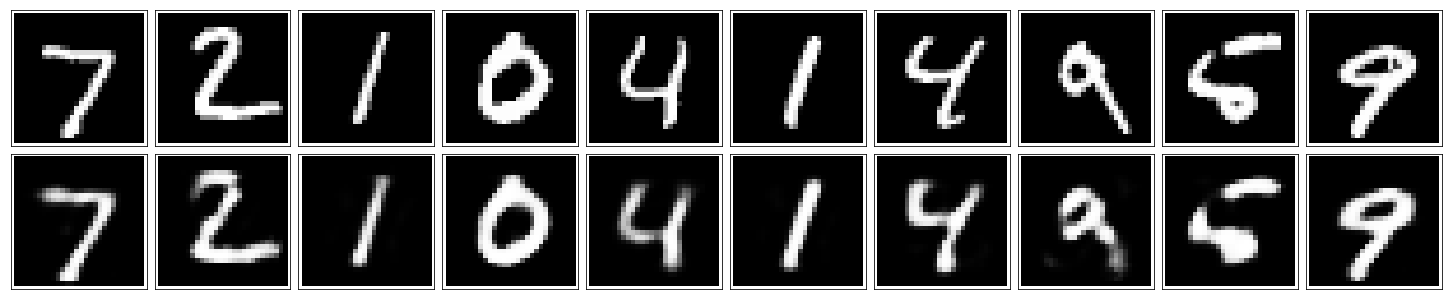

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.